In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
central_files = [filename for filename in os.listdir(os.path.join(os.getcwd(), 'central')) if 'txt' in filename]
direct_files = [filename for filename in os.listdir(os.path.join(os.getcwd(), 'direct')) if 'txt' in filename]

In [3]:
df_central = pd.DataFrame()
for filename in central_files:
    df_central = df_central.append(pd.read_csv(f'central/{filename}'))

df_direct = pd.DataFrame()
for filename in direct_files:
    df_direct = df_direct.append(pd.read_csv(f'direct/{filename}'))  
    
df = df_central.assign(type='centralized').append(df_direct.assign(type='direct'))
df['publisher'] = df['publisher'].str.split(':').str[0]
df['total_time_seconds'] = df['total_time_seconds'] * 1000

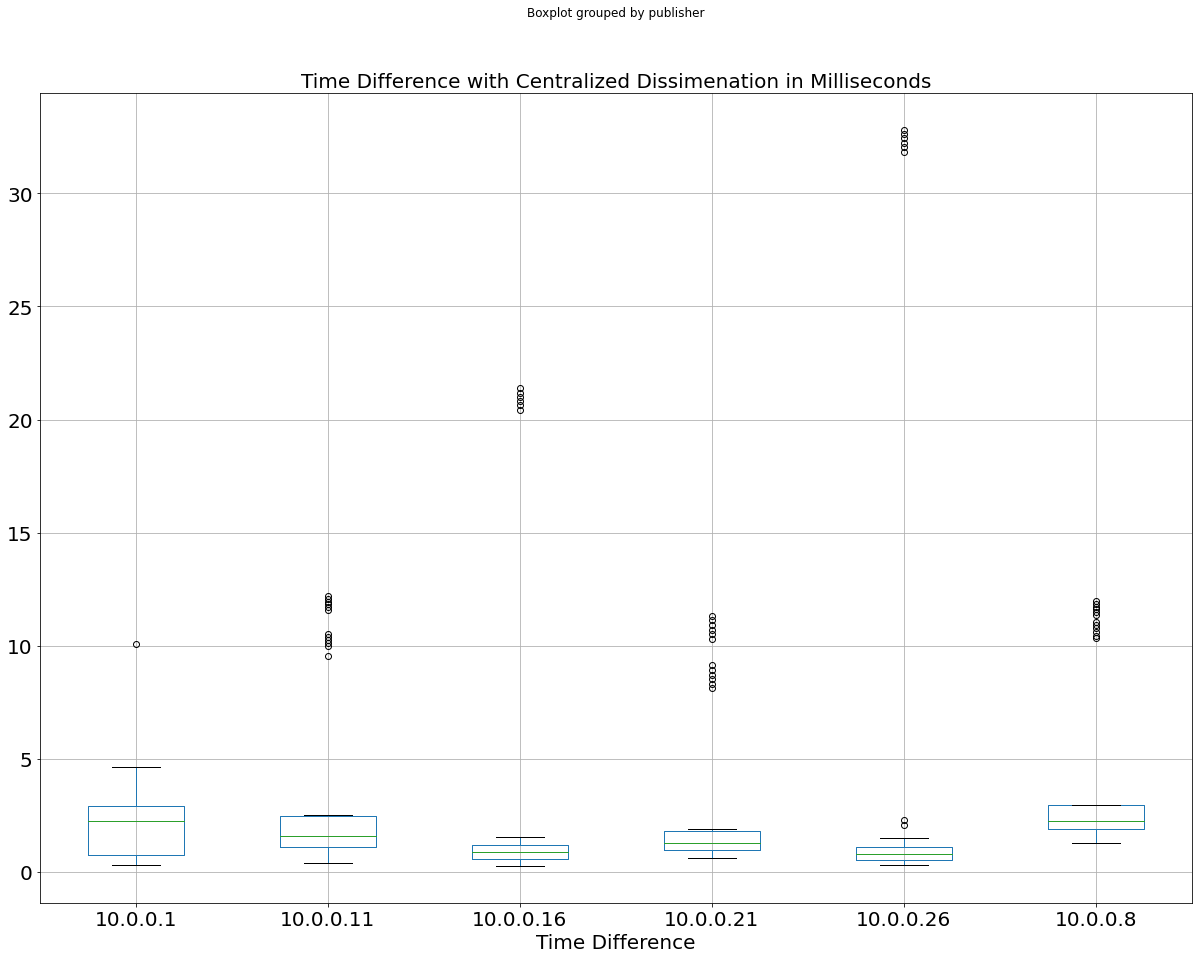

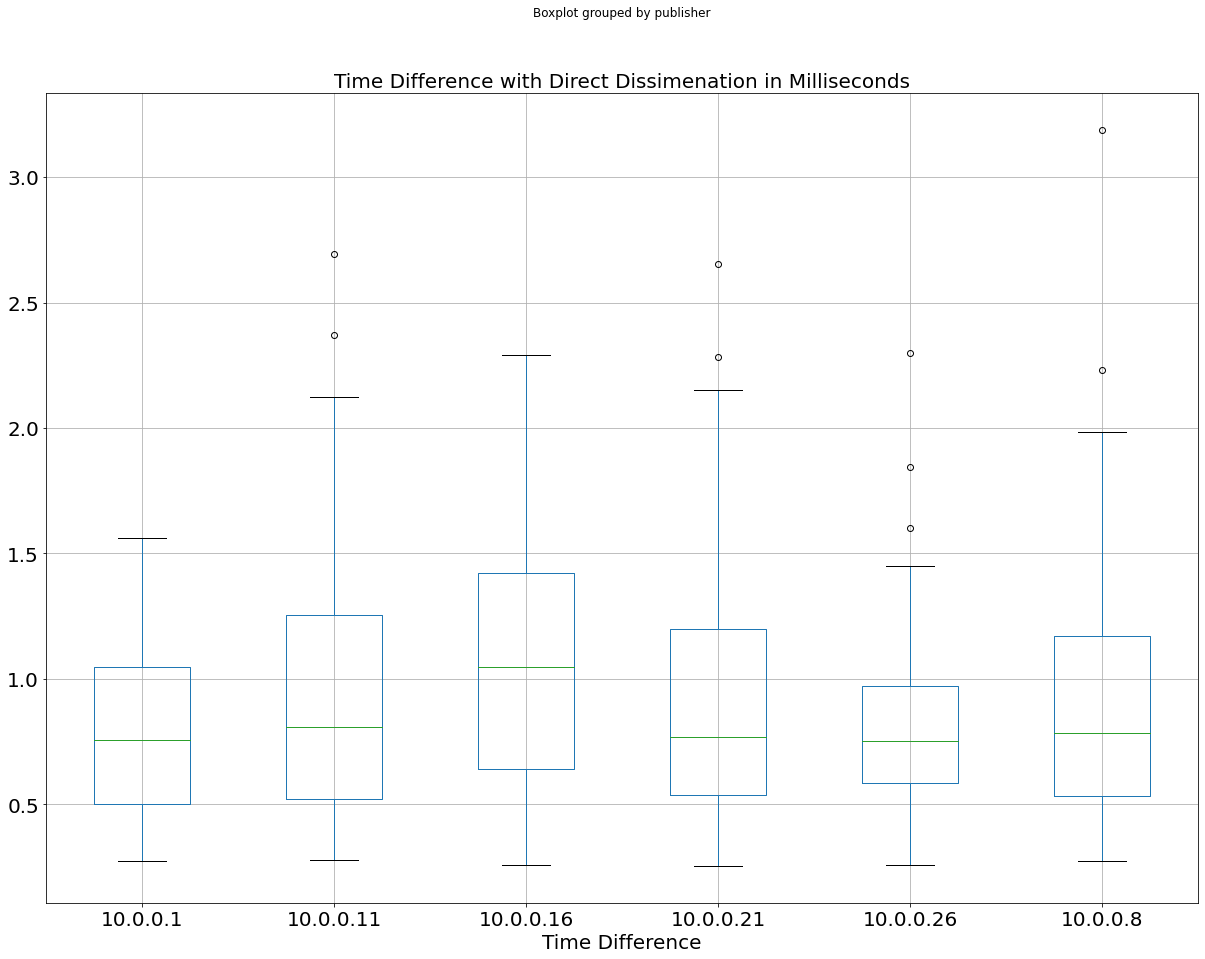

In [4]:
for publish_type in df['type'].unique():
    df_type = df[df['type'] == publish_type]
    box = df_type.boxplot(column=['total_time_seconds'], by=['publisher'], figsize=(20, 15), fontsize=20)
    xlabel = box.set_xlabel('Publisher', fontsize=20)
    ylabel = box.set_xlabel('Time Difference', fontsize=20)
    title = box.set_title(f'Time Difference with {publish_type.capitalize()} Dissimenation in Milliseconds', fontsize=20)
    box.get_figure().savefig(f'{publish_type}.png')  

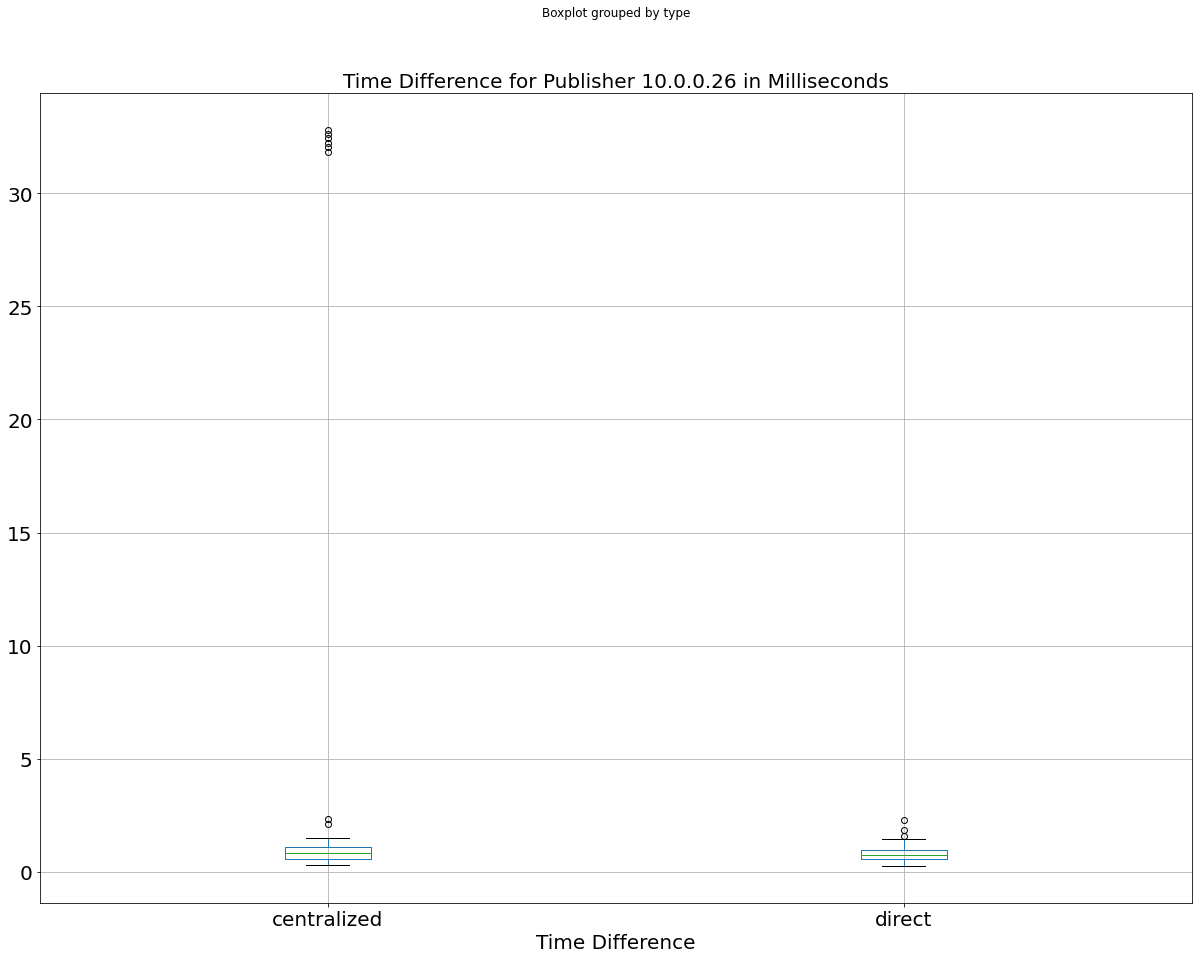

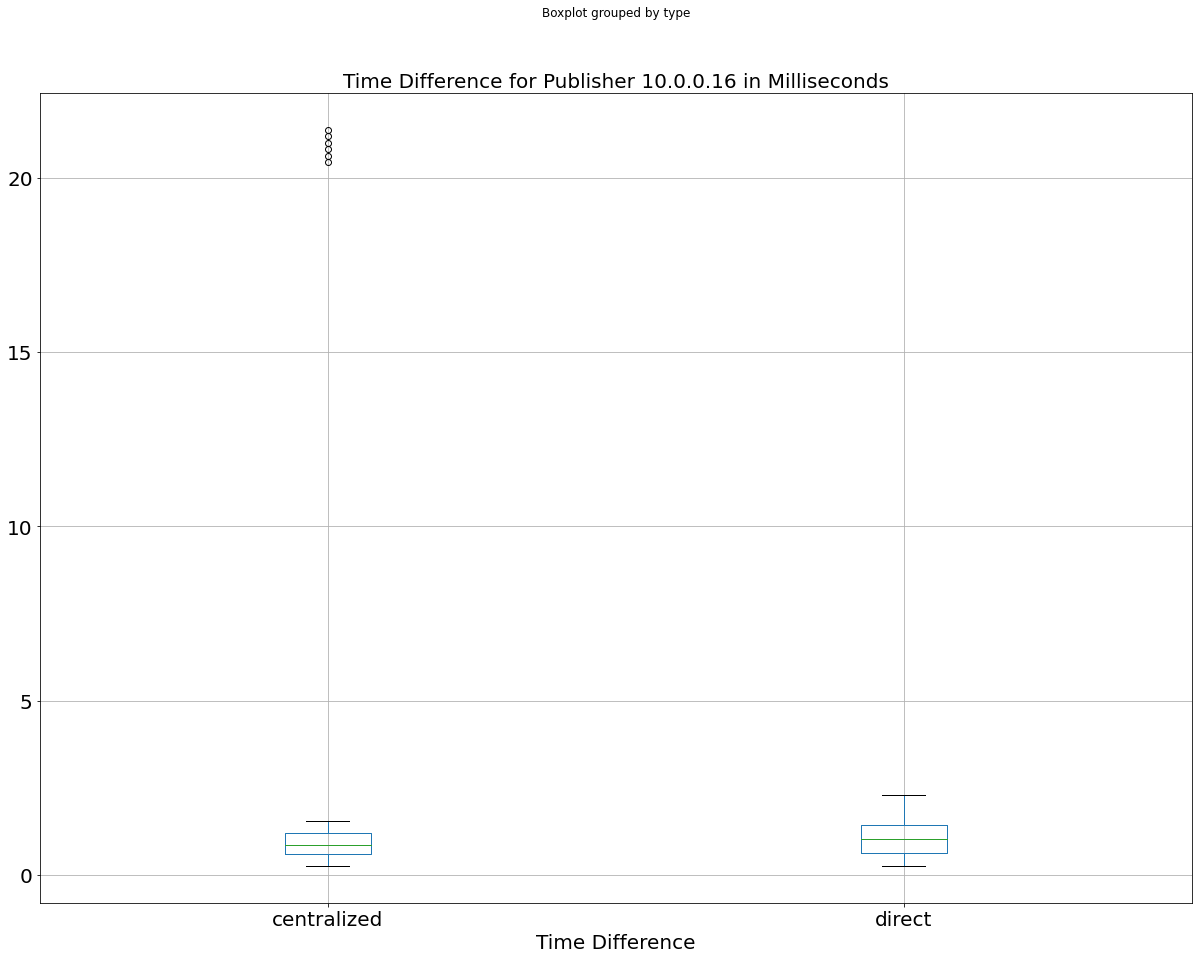

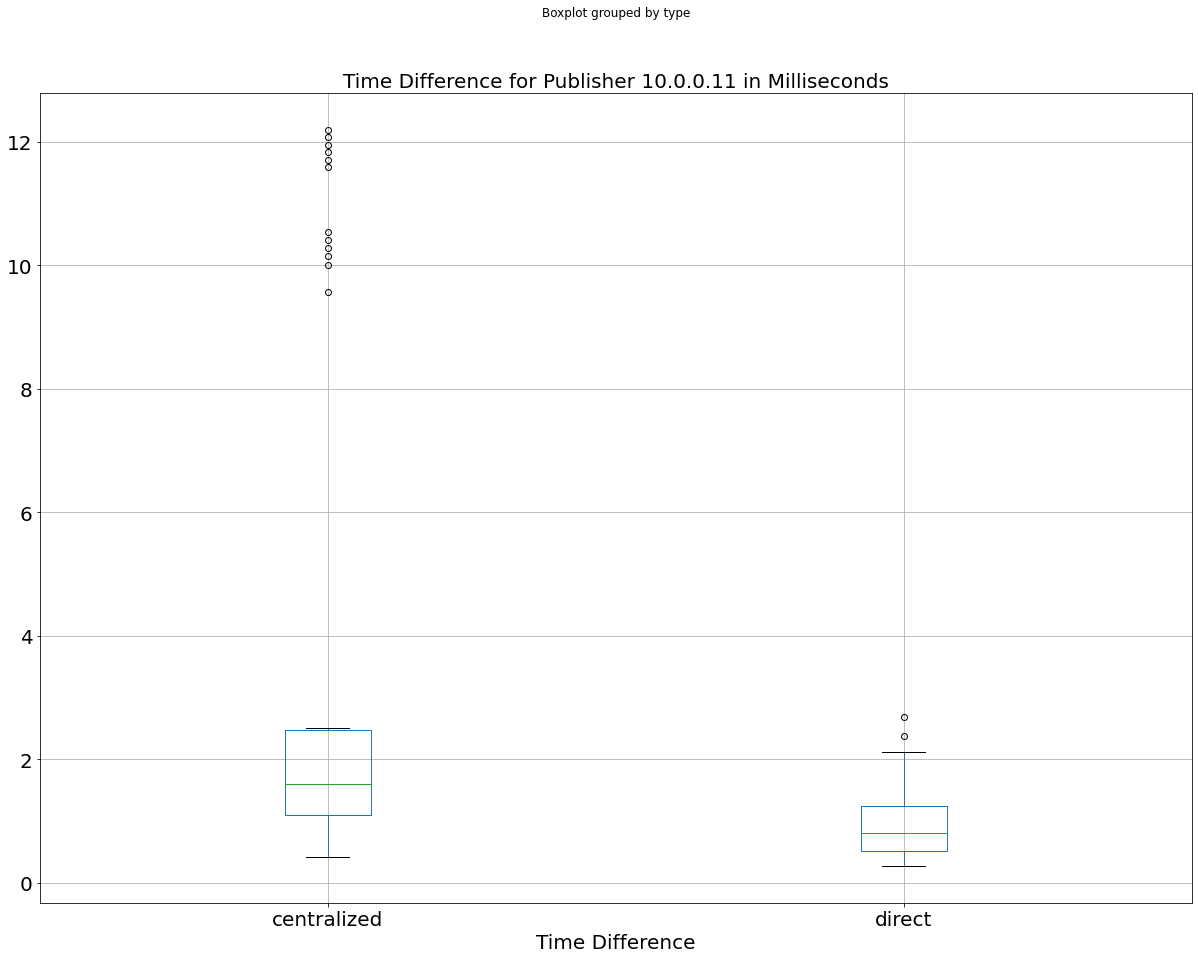

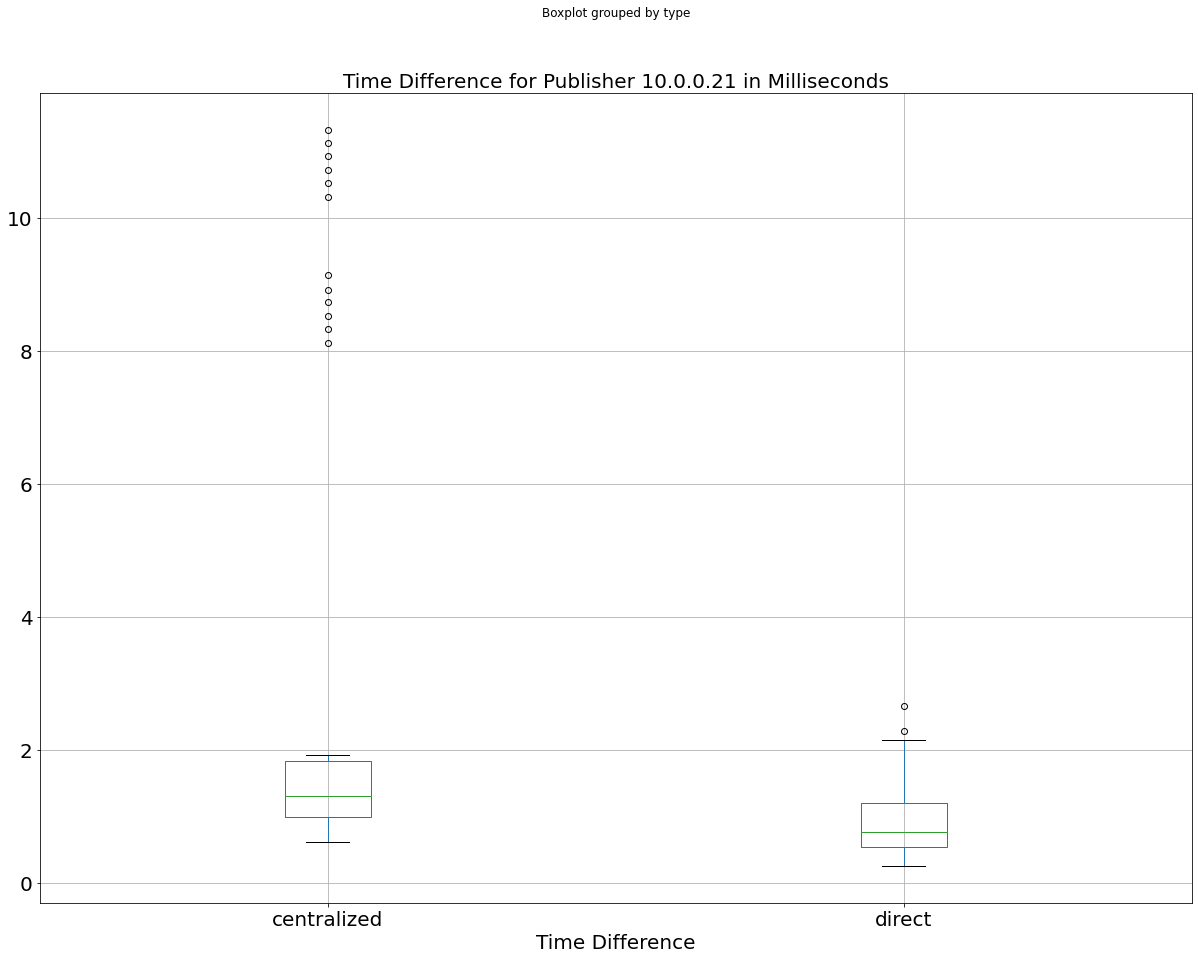

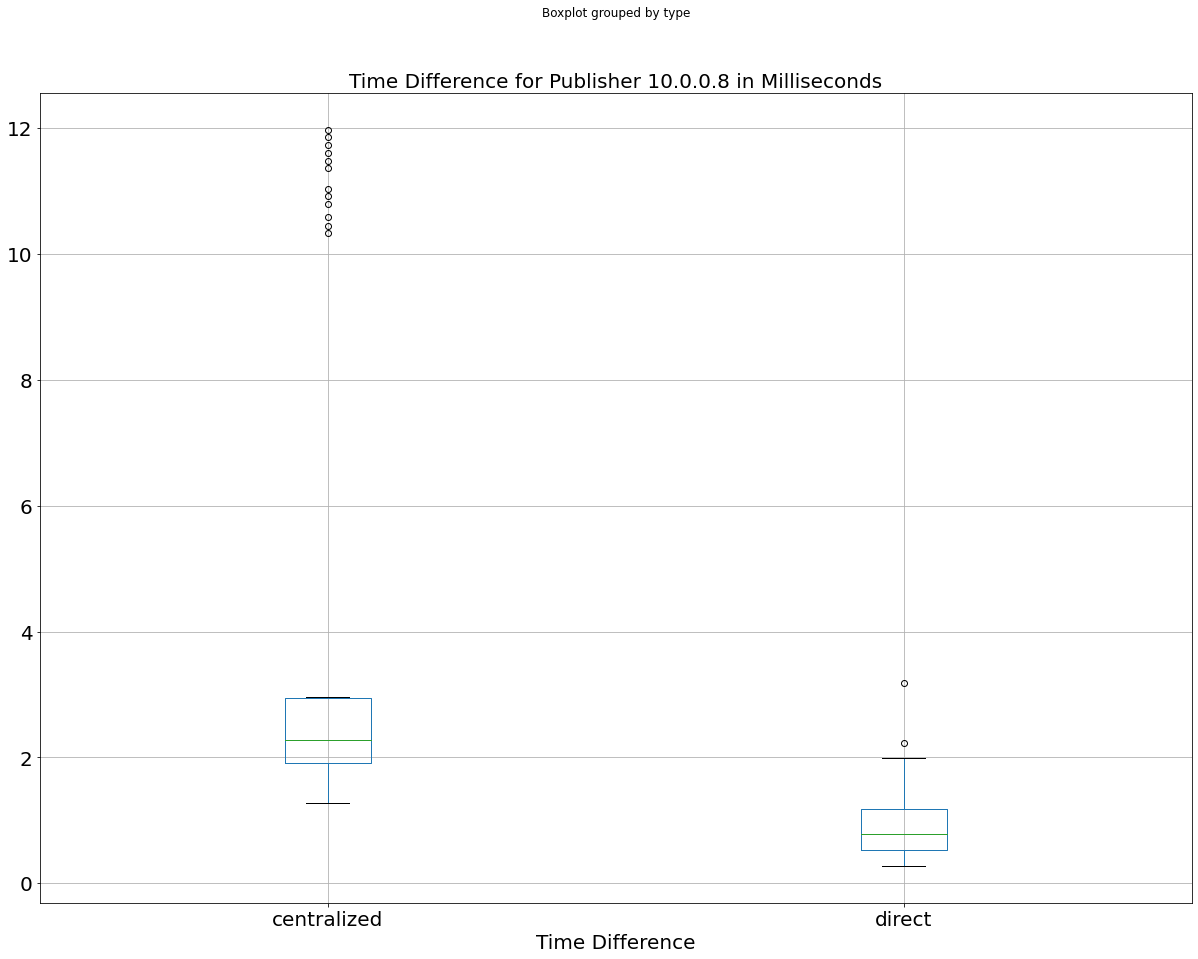

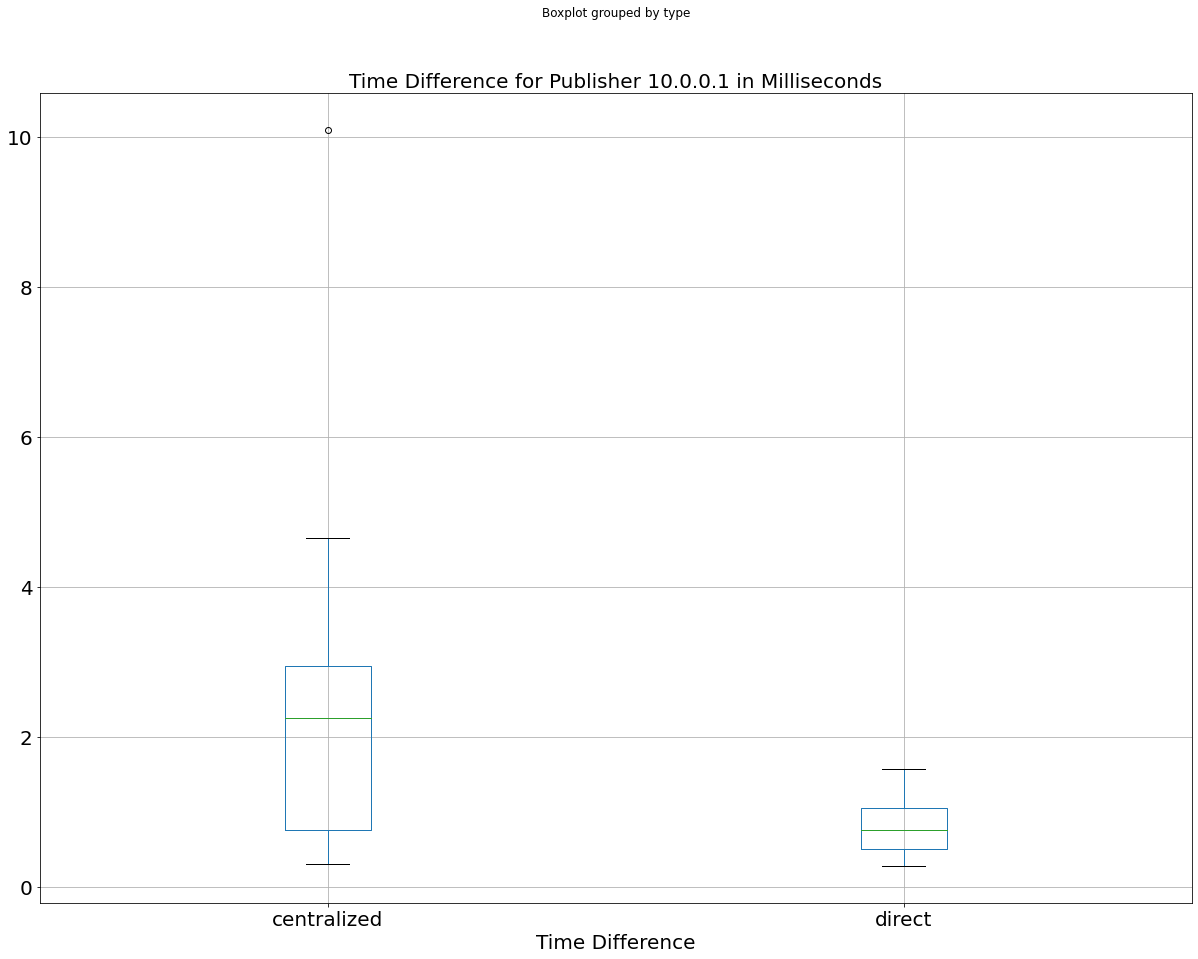

In [5]:
for publisher in df['publisher'].unique():
    df_publisher = df[df['publisher'] == publisher]
    box = df_publisher.boxplot(column=['total_time_seconds'], by=['type'], figsize=(20, 15), fontsize=20)
    xlabel = box.set_xlabel('Dissemination Method', fontsize=20)
    ylabel = box.set_xlabel('Time Difference', fontsize=20)
    title = box.set_title(f'Time Difference for Publisher {publisher} in Milliseconds', fontsize=20)
    box.get_figure().savefig(f'{publisher}.png')  

In [8]:
df.groupby('publisher').count()

,topic,total_time_seconds,type
publisher,,,
10.0.0.1,92,92,92
10.0.0.11,99,99,99
10.0.0.16,98,98,98
10.0.0.21,100,100,100
10.0.0.26,99,99,99
10.0.0.8,100,100,100


In [9]:
df_four = pd.read_csv('combined.csv')

In [10]:
df_four.head()

,Unnamed: 0,publisher,topic,total_time_seconds,type,setup
0,0,10.0.0.11,B,0.569105,centralized,four_pub_four_sub
1,1,10.0.0.16,B,0.412226,centralized,four_pub_four_sub
2,2,10.0.0.21,C,0.555754,centralized,four_pub_four_sub
3,3,10.0.0.11,C,0.537872,centralized,four_pub_four_sub
4,4,10.0.0.16,C,0.473976,centralized,four_pub_four_sub


In [11]:
df_four = df_four.drop('Unnamed: 0', axis=1)

In [12]:
df_four.head()

,publisher,topic,total_time_seconds,type,setup
0,10.0.0.11,B,0.569105,centralized,four_pub_four_sub
1,10.0.0.16,B,0.412226,centralized,four_pub_four_sub
2,10.0.0.21,C,0.555754,centralized,four_pub_four_sub
3,10.0.0.11,C,0.537872,centralized,four_pub_four_sub
4,10.0.0.16,C,0.473976,centralized,four_pub_four_sub


In [13]:
df_six = df.assign(setup='six_pub_six_sub')

In [14]:
df_six.head()

,publisher,topic,total_time_seconds,type,setup
0,10.0.0.26,C,0.721693,centralized,six_pub_six_sub
1,10.0.0.16,C,0.658989,centralized,six_pub_six_sub
2,10.0.0.11,C,0.532150,centralized,six_pub_six_sub
3,10.0.0.21,C,10.515690,centralized,six_pub_six_sub
4,10.0.0.8,C,11.483192,centralized,six_pub_six_sub


In [15]:
df_combined = df_four.append(df_six[df_six['publisher'].isin(df_four['publisher'].unique())])

In [16]:
df_combined.head()

,publisher,topic,total_time_seconds,type,setup
0,10.0.0.11,B,0.569105,centralized,four_pub_four_sub
1,10.0.0.16,B,0.412226,centralized,four_pub_four_sub
2,10.0.0.21,C,0.555754,centralized,four_pub_four_sub
3,10.0.0.11,C,0.537872,centralized,four_pub_four_sub
4,10.0.0.16,C,0.473976,centralized,four_pub_four_sub


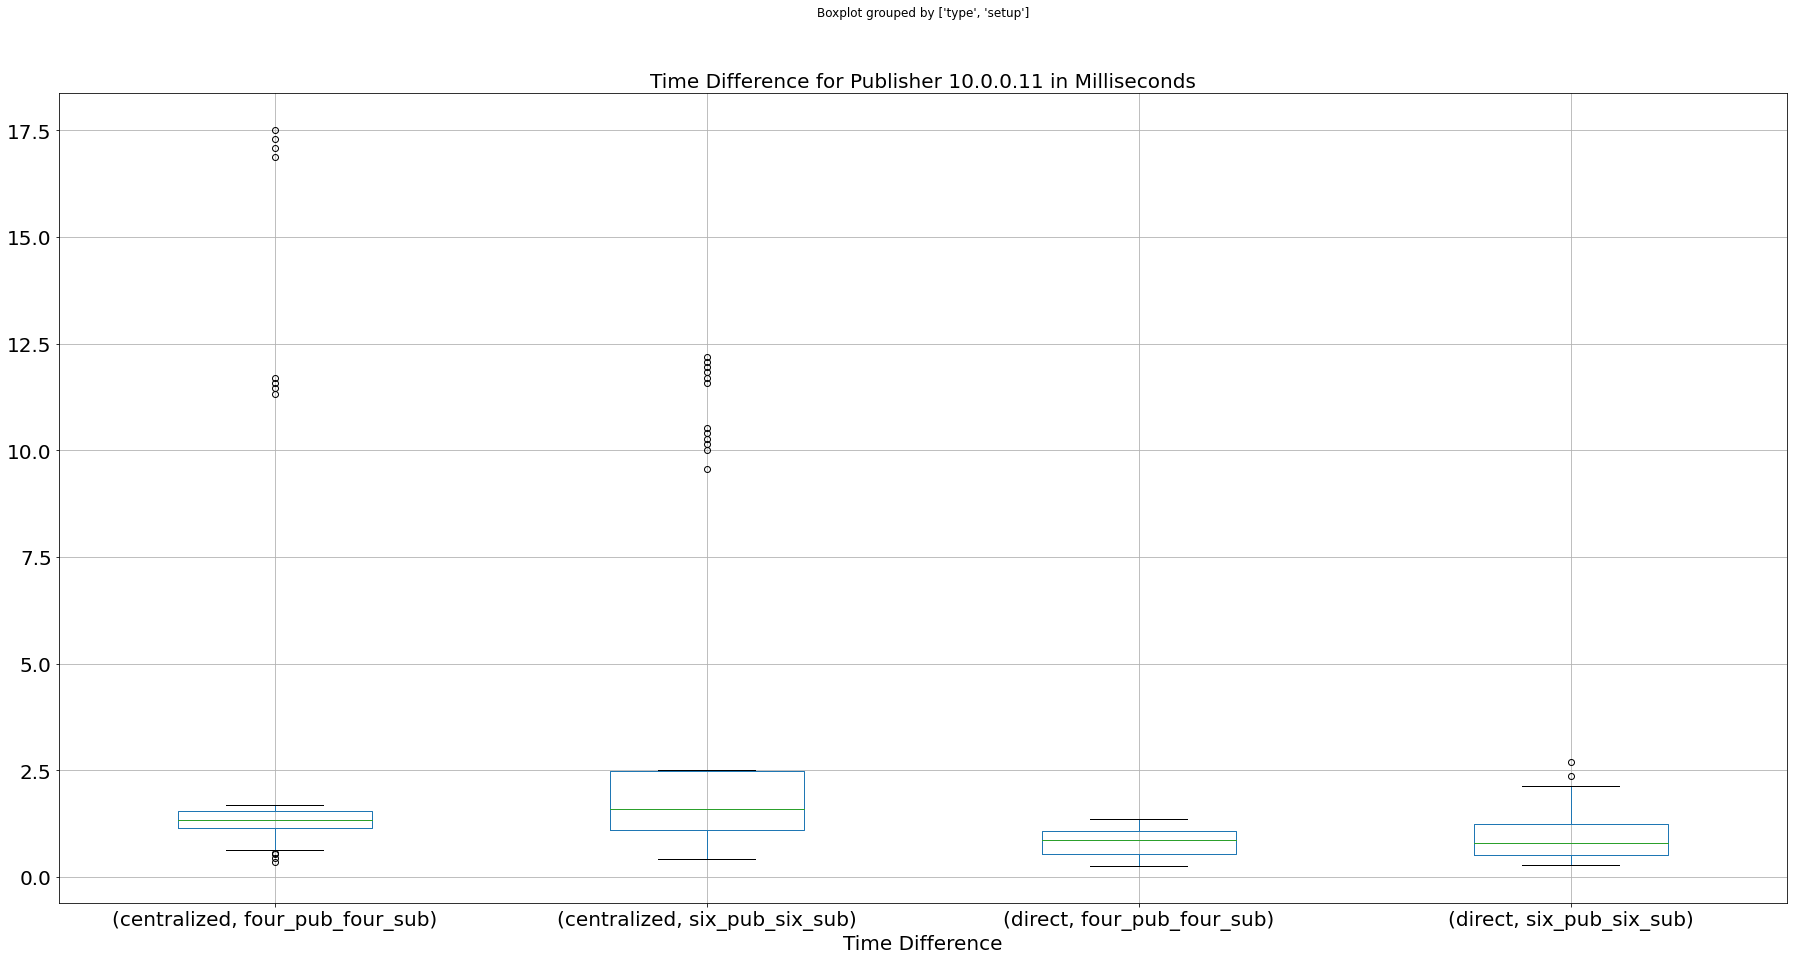

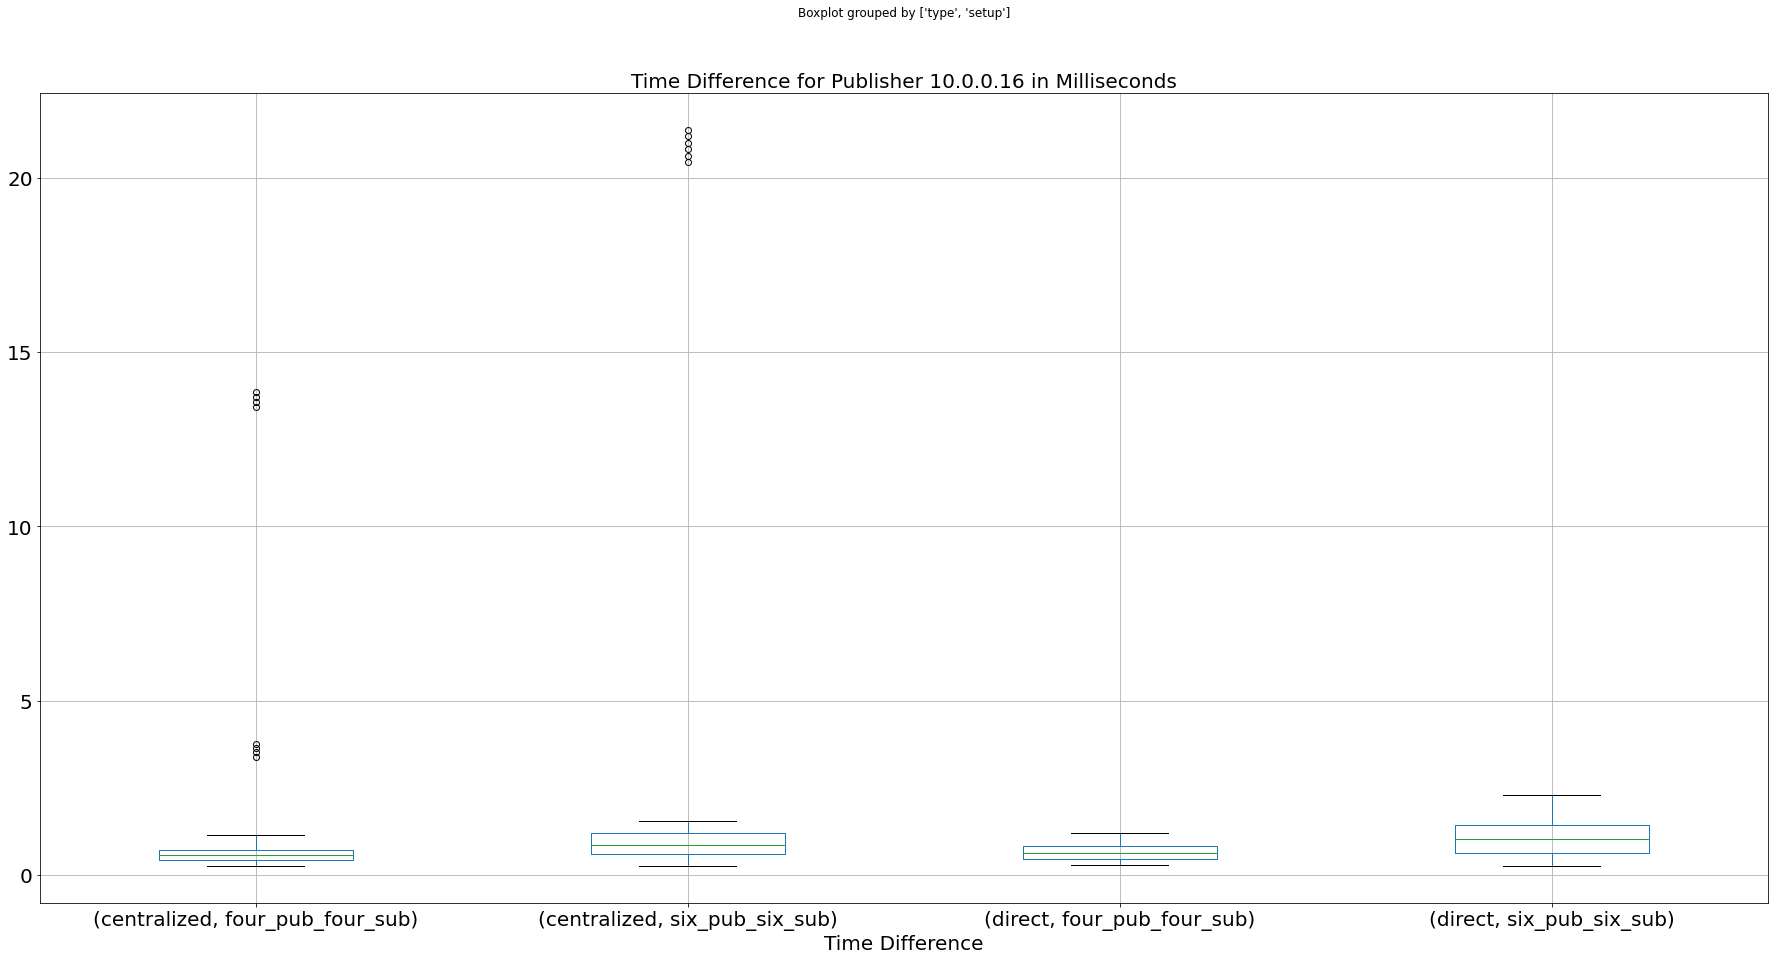

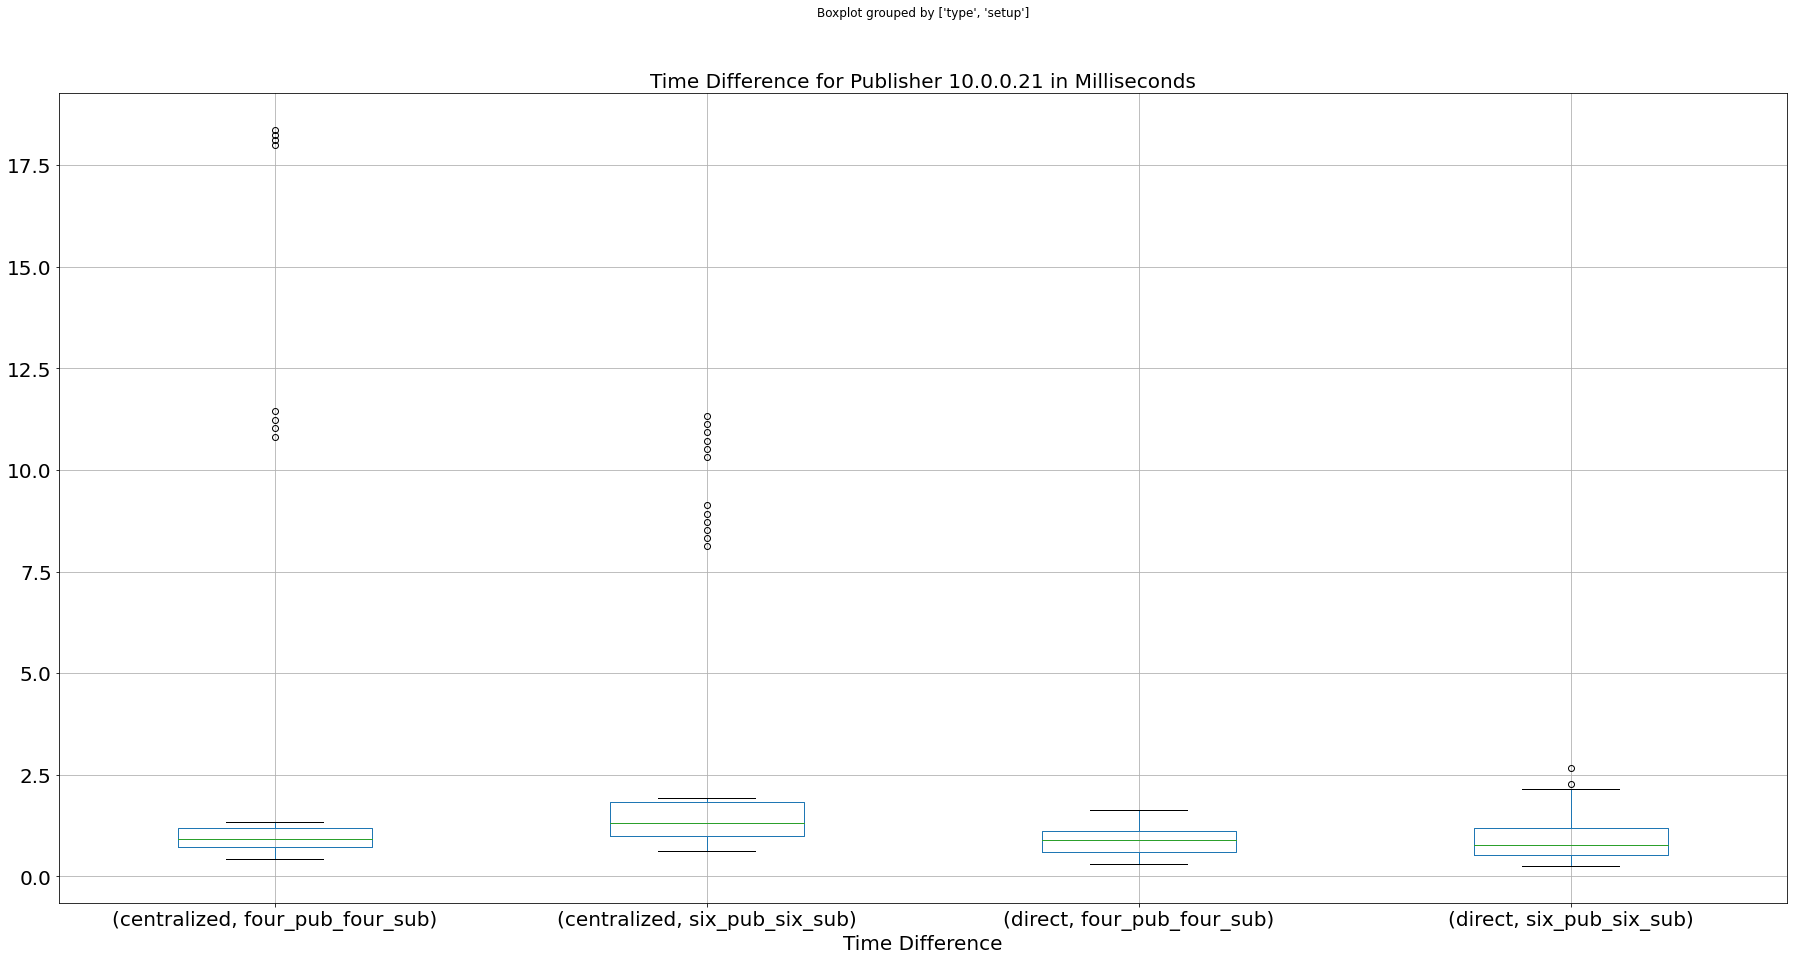

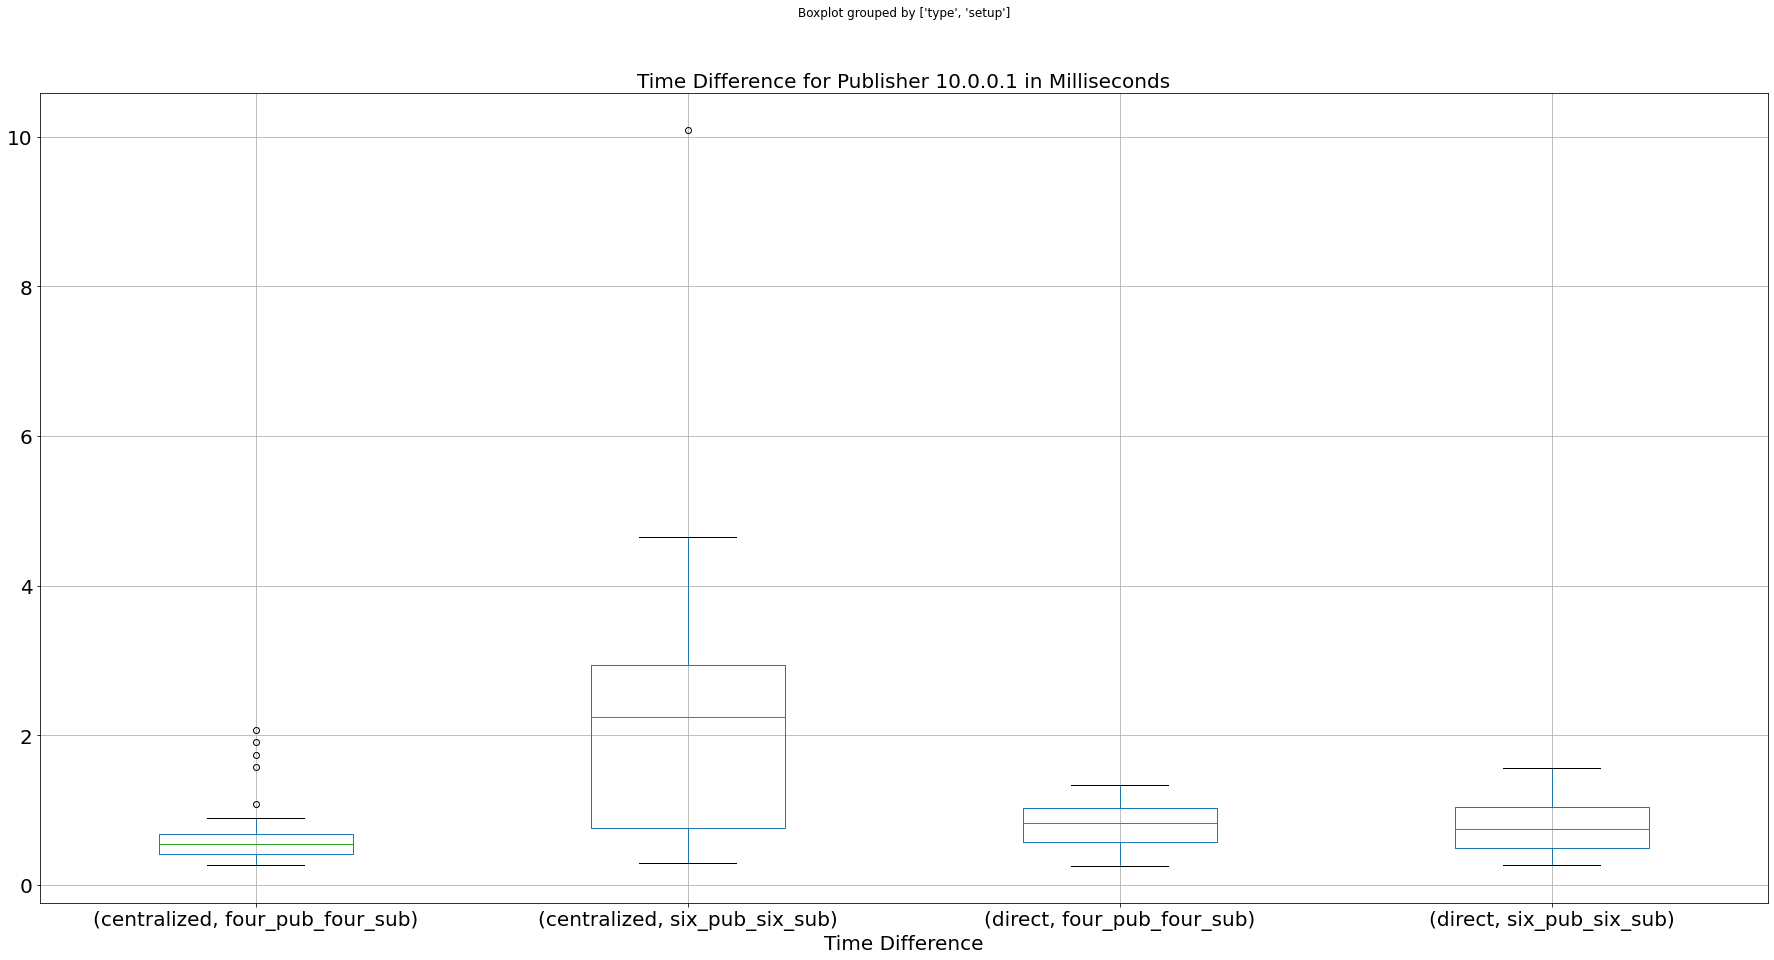

In [18]:
for publisher in df_combined['publisher'].unique():
    df_publisher = df_combined[df_combined['publisher'] == publisher]
    box = df_publisher.boxplot(column=['total_time_seconds'], by=['type', 'setup'], figsize=(30, 15), fontsize=20)
    xlabel = box.set_xlabel('Dissemination Method', fontsize=20)
    ylabel = box.set_xlabel('Time Difference', fontsize=20)
    title = box.set_title(f'Time Difference for Publisher {publisher} in Milliseconds', fontsize=20)
    box.get_figure().savefig(f'Six vs Four {publisher}.png')  